#Pre

In [ ]:
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df_center_21 = pd.read_csv('./drive/MyDrive/Streetview/central_2021_avg.csv')
df_center_19 = pd.read_csv('./drive/MyDrive/Streetview/central_2019_avg_newest.csv')
# df_center = pd.merge(df_center_21, df_center_19, how='left', on=["Location"])
# df_center = df_center[df_center['lat'].notna()]
df_center = df_center_19
df_center['Central']=1
df_center['Inner']=0
df_center['Outer']=0
df_center.head()

,Location,Number of private cycles,Number of cycle hire bikes,Total cycles,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,airport,amusement park,aquarium,art gallery,atm,bakery,bank,bar,beauty salon,bicycle store,book store,bowling alley,bus station,cafe,campground,car dealer,car rental,car repair,car wash,casino,cemetery,church,city hall,clothing store,convenience store,courthouse,dentist,department store,doctor,drugstore,electrician,electronics store,embassy,fire station,florist,funeral home,furniture store,gas station,gym,hair care,hardware store,hindu temple,home goods store,hospital,insurance agency,jewelry store,laundry,lawyer,library,light rail station,liquor store,local government office,locksmith,lodging,meal delivery,meal takeaway,mosque,movie rental,movie theater,moving company,museum,night club,painter,park,parking,pet store,pharmacy,physiotherapist,plumber,police,post office,primary school,real estate agency,restaurant,roofing contractor,rv park,school,secondary school,shoe store,shopping mall,spa,stadium,storage,store,subway station,supermarket,synagogue,taxi stand,tourist attraction,train station,transit station,travel agency,university,veterinary care,zoo,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer
0,Albert Embankment (South of Salamanca Street),1470.375,162.250,1632.625,51.490324,-0.122632,POINT (-0.1226315 51.4903238),E01003109,Lambeth 003E,8,1,0,0,14,6,4,3,19,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,9,NaN,6,11,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,32,NaN,NaN,15,NaN,NaN,0,NaN,1,NaN,NaN,2,7,NaN,NaN,NaN,4,37,NaN,0,NaN,0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1,Aldgate High Street,1592.750,159.750,1752.500,51.514015,-0.075322,POINT (-0.0753219 51.5140145),E01000005,City of London 001E,55,2,0,0,25,20,9,56,60,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,1,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,5,10,NaN,8,29,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,60,NaN,NaN,20,NaN,NaN,11,NaN,0,NaN,NaN,9,18,NaN,NaN,NaN,7,49,NaN,10,NaN,0,14.0,1.0,16.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0
2,Aldwych,1141.000,191.375,1332.375,51.513226,-0.117359,POINT (-0.1173591 51.5132258),E01004735,Westminster 018B,48,1,0,1,31,15,17,20,53,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,11,10,NaN,7,15,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,60,NaN,NaN,20,NaN,NaN,13,NaN,0,NaN,NaN,7,13,NaN,NaN,NaN,6,32,NaN,5,NaN,0,21.0,NaN,15.0,NaN,4.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1,0,0
3,Appold Street,764.125,84.750,848.875,51.520722,-0.081802,POINT (-0.0818023 51.5207216),E01032739,City of London 001F,60,3,0,0,49,23,10,56,60,NaN,NaN,NaN,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,7,11,NaN,3,31,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,60,NaN,NaN,13,NaN,NaN,13,NaN,0,NaN,NaN,9,22,NaN,NaN,NaN,6,59,NaN,6,NaN,0,NaN,3.0,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1,0,0
4,Arundel Street,203.750,41.250,245.000,51.512529,-0.114368,POINT (-0.1143676 51.5125289),E01004735,Westminster 018B,50,2,0,1,16,15,12,23,40,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,11,10,NaN,5,18,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,60,NaN,NaN,17,NaN,NaN,7,NaN,0,NaN,NaN,6,15,NaN,NaN,NaN,3,29,NaN,4,NaN,0,16.0,NaN,19.0,1.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,1,0,0


In [ ]:
df_inner_21 = pd.read_csv('./drive/MyDrive/Streetview/inner_2021_avg.csv')
df_inner_19 = pd.read_csv('./drive/MyDrive/Streetview/inner_2019_id_final.csv')

# df_inner = pd.merge(df_inner_21, df_inner_19, how='left', on=["Location"])
# df_inner = df_inner[df_inner['lat'].notna()]
df_inner = df_inner_19
df_inner['Central']=0
df_inner['Inner']=1
df_inner['Outer']=0
df_inner.head()


,Site ID,Location,Number of private cycles,Number of cycle hire bikes,Total cycles,Easting,Northing,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,airport,amusement park,aquarium,art gallery,atm,bakery,bank,bar,beauty salon,bicycle store,book store,bowling alley,bus station,cafe,campground,car dealer,car rental,car repair,car wash,casino,cemetery,church,city hall,clothing store,convenience store,courthouse,dentist,department store,doctor,drugstore,electrician,electronics store,embassy,fire station,florist,funeral home,furniture store,gas station,gym,hair care,hardware store,hindu temple,home goods store,hospital,insurance agency,jewelry store,laundry,lawyer,library,light rail station,liquor store,local government office,locksmith,lodging,meal delivery,meal takeaway,mosque,movie rental,movie theater,moving company,museum,night club,painter,park,parking,pet store,pharmacy,physiotherapist,plumber,police,post office,primary school,real estate agency,restaurant,roofing contractor,rv park,school,secondary school,shoe store,shopping mall,spa,stadium,storage,store,subway station,supermarket,synagogue,taxi stand,tourist attraction,train station,transit station,travel agency,university,veterinary care,zoo,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer
0,INNCY001,Grove Road,898.0,29.5,927.5,536005.2346,183224.9317,51.531559,-0.040640,POINT (-0.0406404089449611 51.53155875667294),E01004234,Tower Hamlets 003E,4,NaN,NaN,NaN,NaN,NaN,NaN,1,6,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,NaN,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,10,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,1,30,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1,INNCY002,Lea Bridge Road,1374.0,0.5,1374.5,535642.2540,186677.1935,51.562669,-0.044540,POINT (-0.0445404060729519 51.56266855287201),E01004422,Waltham Forest 022A,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2,NaN,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,5,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,25,NaN,0,NaN,NaN,6.0,NaN,12.0,NaN,3.0,NaN,3.0,1.0,NaN,NaN,NaN,1.0,NaN,0,1,0
2,INNCY003,Burdett Road (south of Limehouse Cut),688.0,53.0,741.0,536945.0000,181263.0000,51.513702,-0.027863,POINT (-0.0278625244271789 51.51370170197896),E01004252,Tower Hamlets 024A,2,NaN,NaN,NaN,NaN,NaN,NaN,3,5,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,4,0,NaN,9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,18,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,2,35,NaN,1,NaN,NaN,4.0,NaN,16.0,NaN,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,0,1,0
3,INNCY003,Burdett Road (south of Limehouse Cut),688.0,53.0,741.0,536945.0000,181263.0000,51.513702,-0.027863,POINT (-0.0278625244271789 51.51370170197896),E01004252,Tower Hamlets 024A,2,NaN,NaN,NaN,NaN,NaN,NaN,3,5,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,4,0,NaN,9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,18,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,2,35,NaN,1,NaN,NaN,4.0,NaN,16.0,NaN,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,0,1,0
4,INNCY004,Seven Sisters Road (Finsbury Park),1239.0,15.0,1254.0,531355.3829,186695.0883,51.563843,-0.106342,POINT (-0.1063416792390218 51.56384316910162),E01002734,Islington 005B,8,NaN,NaN,NaN,NaN,NaN,NaN,8,16,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN

In [ ]:
df_outer_19 = pd.read_csv('./drive/MyDrive/Streetview/outer_2019_id_final.csv')
df_outer = df_outer_19
df_outer['Central']=0
df_outer['Inner']=0
df_outer['Outer']=1
df_outer.head()

,Site ID,Location,Total cycles,Easting,Northing,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,airport,amusement park,aquarium,art gallery,atm,bakery,bank,bar,beauty salon,bicycle store,book store,bowling alley,bus station,cafe,campground,car dealer,car rental,car repair,car wash,casino,cemetery,church,city hall,clothing store,convenience store,courthouse,dentist,department store,doctor,drugstore,electrician,electronics store,embassy,fire station,florist,funeral home,furniture store,gas station,gym,hair care,hardware store,hindu temple,home goods store,hospital,insurance agency,jewelry store,laundry,lawyer,library,light rail station,liquor store,local government office,locksmith,lodging,meal delivery,meal takeaway,mosque,movie rental,movie theater,moving company,museum,night club,painter,park,parking,pet store,pharmacy,physiotherapist,plumber,police,post office,primary school,real estate agency,restaurant,roofing contractor,rv park,school,secondary school,shoe store,shopping mall,spa,stadium,storage,store,subway station,supermarket,synagogue,taxi stand,tourist attraction,train station,transit station,travel agency,university,veterinary care,zoo,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer
0,OUTCY001,High Road Leyton,283.5,538032.2664,186597.9861,51.561377,-0.010114,POINT (-0.010113954228738 51.56137745892148),E01004375,Waltham Forest 025D,15,NaN,NaN,NaN,NaN,NaN,NaN,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,10,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,1,31,NaN,0,NaN,NaN,2.0,NaN,10.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1,OUTCY002,High Road Woodford Green,137.5,540222.3690,192346.2507,51.612490,0.023754,POINT (0.0237540113560592 51.61249002827173),E01003746,Redbridge 001C,6,NaN,NaN,NaN,NaN,NaN,NaN,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,9,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,12,NaN,0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,0,1
2,OUTCY003,Wood Lane,136.5,549195.8400,186902.1291,51.561270,0.150945,POINT (0.1509453596279197 51.561270291288885),E01000061,Barking and Dagenham 006C,3,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,12,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,0,20,NaN,1,NaN,NaN,NaN,NaN,18.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,OUTCY004,London Road,99.5,549109.9512,188238.8864,51.573304,0.150274,POINT (0.1502739339977588 51.57330378314518),E01002250,Havering 017E,9,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,6,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,0,12,NaN,1,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
4,OUTCY005,Nags Head Road,51.5,535646.5250,196128.6580,51.647599,-0.040826,POINT (-0.0408260414561462 51.64759887125628),E01001509,Enfield 014C,8,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,11,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df = df_center.append(df_inner)
df = df.append(df_outer)
gsv_column_name = ['person','bicycle','car','motorcycle','bus', 'train', 'truck','traffic light', 'fire hydrant', 'stop sign',
'parking meter',  'bench','dog']
df[gsv_column_name] = df[gsv_column_name].fillna(0)
df.head()

,Location,Number of private cycles,Number of cycle hire bikes,Total cycles,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,airport,amusement park,aquarium,art gallery,atm,bakery,bank,bar,beauty salon,bicycle store,book store,bowling alley,bus station,cafe,campground,car dealer,car rental,car repair,car wash,casino,cemetery,church,city hall,clothing store,convenience store,courthouse,dentist,department store,doctor,drugstore,electrician,electronics store,embassy,fire station,florist,funeral home,furniture store,gas station,gym,hair care,hardware store,hindu temple,home goods store,hospital,insurance agency,jewelry store,laundry,lawyer,library,light rail station,liquor store,local government office,locksmith,lodging,meal delivery,meal takeaway,mosque,movie rental,movie theater,moving company,museum,night club,painter,park,parking,pet store,pharmacy,physiotherapist,plumber,police,post office,primary school,real estate agency,restaurant,roofing contractor,rv park,school,secondary school,shoe store,shopping mall,spa,stadium,storage,store,subway station,supermarket,synagogue,taxi stand,tourist attraction,train station,transit station,travel agency,university,veterinary care,zoo,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer,Site ID,Easting,Northing
0,Albert Embankment (South of Salamanca Street),1470.375,162.250,1632.625,51.490324,-0.122632,POINT (-0.1226315 51.4903238),E01003109,Lambeth 003E,8,1.0,0.0,0.0,14.0,6.0,4.0,3,19,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3,9,NaN,6,11,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,32,NaN,NaN,15,NaN,NaN,0,NaN,1.0,NaN,NaN,2.0,7,NaN,NaN,NaN,4,37,NaN,0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,NaN,NaN,NaN
1,Aldgate High Street,1592.750,159.750,1752.500,51.514015,-0.075322,POINT (-0.0753219 51.5140145),E01000005,City of London 001E,55,2.0,0.0,0.0,25.0,20.0,9.0,56,60,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5,10,NaN,8,29,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,60,NaN,NaN,20,NaN,NaN,11,NaN,0.0,NaN,NaN,9.0,18,NaN,NaN,NaN,7,49,NaN,10,NaN,0.0,14.0,1.0,16.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,NaN,NaN,NaN
2,Aldwych,1141.000,191.375,1332.375,51.513226,-0.117359,POINT (-0.1173591 51.5132258),E01004735,Westminster 018B,48,1.0,0.0,1.0,31.0,15.0,17.0,20,53,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,11,10,NaN,7,15,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,60,NaN,NaN,20,NaN,NaN,13,NaN,0.0,NaN,NaN,7.0,13,NaN,NaN,NaN,6,32,NaN,5,NaN,0.0,21.0,0.0,15.0,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0,NaN,NaN,NaN
3,Appold Street,764.125,84.750,848.875,51.520722,-0.081802,POINT (-0.0818023 51.5207216),E01032739,City of London 001F,60,3.0,0.0,0.0,49.0,23.0,10.0,56,60,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,7,11,NaN,3,31,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,60,NaN,NaN,13,NaN,NaN,13,NaN,0.0,NaN,NaN,9.0,22,NaN,NaN,NaN,6,59,NaN,6,NaN,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0,NaN,NaN,NaN
4,Arundel Street,203.750,41.250,245.000,51.512529,-0.114368,POINT (-0.1143676 51.5125289),E01004735,Westminster 018B,50,2.0,0.0,1.0,16.0,15.0,12.0,23,40,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,11,10,NaN,5,18,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,60,NaN,N

In [ ]:
df =  df.dropna(axis=1, how="any")
# df = df[df['lat']>51.45]
# df = df[df['lat']<51.55]
# df = df[df['lng']>-0.15]
# df = df[df['lng']<-0.05]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 0 to 462
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         1272 non-null   object 
 1   Total cycles     1272 non-null   float64
 2   lat              1272 non-null   float64
 3   lng              1272 non-null   float64
 4   geometry         1272 non-null   object 
 5   LSOA11CD         1272 non-null   object 
 6   LSOA11NM         1272 non-null   object 
 7   accounting       1272 non-null   int64  
 8   bank             1272 non-null   int64  
 9   bar              1272 non-null   int64  
 10  city hall        1272 non-null   int64  
 11  gym              1272 non-null   int64  
 12  laundry          1272 non-null   int64  
 13  museum           1272 non-null   int64  
 14  night club       1272 non-null   int64  
 15  park             1272 non-null   int64  
 16  parking          1272 non-null   int64  
 17  restaurant     

In [ ]:
lsoa_df = pd.read_csv('./drive/MyDrive/Streetview/lsoa-data-new.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (88,94,158,159) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
lsoa_df.rename({'Lower Super Output Area': 'LSOA11CD'}, axis=1, inplace=True)

In [ ]:
result = pd.merge(df, lsoa_df, how='left', on=["LSOA11CD"])

In [ ]:
result = result.drop(columns='Names')
result = result[result['LSOA11CD']!=0]
result = result.replace('-',0, regex=True)
print(result.isnull().values.any(),result.shape)
result =  result.fillna(0)
print(result.isnull().values.any(),result.shape)

True (1272, 204)
False (1272, 204)


In [ ]:
result.head()

,Location,Total cycles,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,bank,bar,city hall,gym,laundry,museum,night club,park,parking,restaurant,school,shopping mall,supermarket,train station,transit station,university,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer,Mid-year Population Estimates;All Ages;2013,Mid-year Population Estimates;Aged 0-15;2013,Mid-year Population Estimates;Aged 16-29;2013,Mid-year Population Estimates;Aged 30-44;2013,Mid-year Population Estimates;Aged 45-64;2013,Mid-year Population Estimates;Aged 65+;2013,Mid-year Population Estimates;Working-age;2013,2011 Census Population;Age Structure;All Ages,2012 Census Population;Age Structure;0-15,2013 Census Population;Age Structure;16-29,2014 Census Population;Age Structure;30-44,2015 Census Population;Age Structure;45-64,2016 Census Population;Age Structure;65+,2017 Census Population;Age Structure;Working-age,Population Density;Area (Hectares);,Population Density;Persons per hectare;2013,Households;All households;2011,Household Composition;Couple household with dependent children;2011,Household Composition;Couple household without dependent children;2011,Household Composition;Lone parent household;2011,Household Composition;One person household;2011,Household Composition;Other household Types;2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Couple household without dependent children;2011,Household Composition;% Lone parent household;2011,Household Composition;% One person household;2011,Household Composition;% Other multi person household;2011,Ethnic Group;White;2011,Ethnic Group;Mixed/multiple ethnic groups;2011,Ethnic Group;Asian/Asian British;2011,Ethnic Group;Black/African/Caribbean/Black British;2011,Ethnic Group;Other ethnic group;2011,Ethnic Group;BAME;2011,Ethnic Group;White (%);2011,Ethnic Group;Mixed/multiple ethnic groups (%);2011,Ethnic Group;Asian/Asian British (%);2011,Ethnic Group;Black/African/Caribbean/Black British (%);2011,Ethnic Group;Other ethnic group (%);2011,Ethnic Group;BAME (%);2011,Country of Birth;United Kingdom;2011,Country of Birth;Not United Kingdom;2011,Country of Birth;% United Kingdom;2011,Country of Birth;% Not United Kingdom;2011,Household Language;Households with at least one person aged 16 or over with English as a main language;2011,Household Language;Households where no people aged 16 or over have English as a main language;2011,Household Language;% of households with at least one person aged 16 or over with English as a main language;2011,Household Language;% of households where no people aged 16 or over have English as a main language;2011,Religion;Christian;2011,Religion;Buddhist;2011,Religion;Hindu;2011,Religion;Jewish;2011,Religion;Muslim;2011,Religion;Sikh;2011,Religion;Other religion;2011,Religion;No religion;2011,Religion;Religion not stated;2011,Religion;Christian (%);2011,Religion;Buddhist (%);2011,Religion;Hindu (%);2011,Religion;Jewish (%);2011,Religion;Muslim (%);2011,Religion;Sikh (%);2011,Religion;Other religion (%);2011,Religion;No religion (%);2011,Religion;Religion not stated (%);2011,Tenure;Owned outright;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Social rented;2011,Tenure;Private rented;2011,Tenure;Owned outright (%);2011,Tenure;Owned with a mortgage or loan (%);2011,Tenure;Social rented (%);2011,Tenure;Private rented (%);2011,Dwelling type;All Households;2011,Dwelling type;Household spaces with at least one usual resident;2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Detached;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace);2011,"Dwelling type;Flat, maisonette or apartment;2011",Dwelling type;Household spaces with at least one usual resident (%);2011,Dwelling type;Household spaces with no usual residents (%);2011,Dwellin

#Plot

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.7 MB/s 
     |████████████████████████████████| 16.7 MB 36.3 MB/s 
     |████████████████████████████████| 6.3 MB 37.5 MB/s 


In [ ]:
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 18.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 33.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 35.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
  Created wh

In [ ]:
import geopandas
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

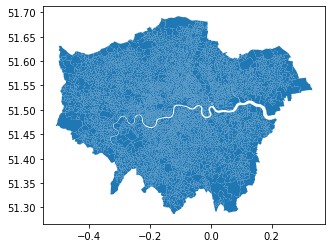

In [ ]:
lsoa = geopandas.read_file('./drive/MyDrive/Streetview/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp',crs="EPSG:4326")
lsoa.to_crs(epsg=4326, inplace=True)
lsoa.plot()
plt.show()

In [ ]:
lsoa.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((-0.07323 51.51000, -0.07553 51.50974..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ..."


In [ ]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['lng'], df['lat']), crs="epsg:4326")
gdf.head()

,Location,Total cycles,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,bank,bar,city hall,gym,laundry,museum,night club,park,parking,restaurant,school,shopping mall,supermarket,train station,transit station,university,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer
0,Albert Embankment (South of Salamanca Street),1632.625,51.490324,-0.122632,POINT (-0.12263 51.49032),E01003109,Lambeth 003E,8,3,19,0,9,4,3,9,6,11,32,15,0,7,4,37,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,Aldgate High Street,1752.500,51.514015,-0.075322,POINT (-0.07532 51.51401),E01000005,City of London 001E,55,56,60,14,26,4,5,10,8,29,60,20,11,18,7,49,10,14.0,1.0,16.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,Aldwych,1332.375,51.513226,-0.117359,POINT (-0.11736 51.51323),E01004735,Westminster 018B,48,20,53,3,15,2,11,10,7,15,60,20,13,13,6,32,5,21.0,0.0,15.0,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,Appold Street,848.875,51.520722,-0.081802,POINT (-0.08180 51.52072),E01032739,City of London 001F,60,56,60,13,33,5,7,11,3,31,60,13,13,22,6,59,6,0.0,3.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,Arundel Street,245.000,51.512529,-0.114368,POINT (-0.11437 51.51253),E01004735,Westminster 018B,50,23,40,4,12,2,11,10,5,18,60,17,7,15,3,29,4,16.0,0.0,19.0,1.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0


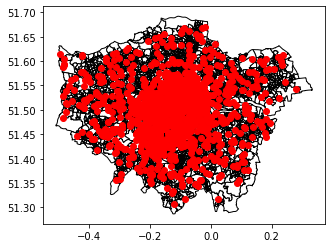

In [ ]:
ax = lsoa.plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

In [ ]:
 gdf.plot(column='bank', ax=ax, legend=True)

<Figure size 432x288 with 0 Axes>

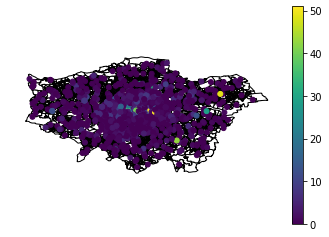

In [ ]:
ax = lsoa.plot(color='white', edgecolor='black')
gplt.pointplot(gdf, hue='person', legend=True, ax=ax)
plt.show()


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


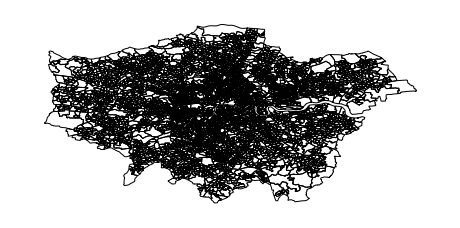

In [ ]:
gplt.polyplot(lsoa, figsize=(8, 8))

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:249: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  'Please specify "legend_var" explicitly when both "hue" and "scale" are '


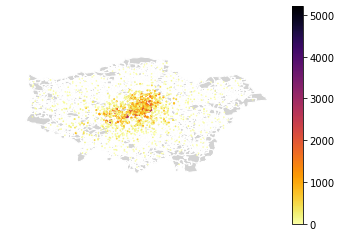

In [ ]:
ax = lsoa.plot(color='lightgray', edgecolor='white')
gplt.pointplot(
    gdf, hue='Total cycles', scale='Total cycles', limits=(0.5, 5), cmap='inferno_r',
    legend=True, ax=ax)
# plt.title("Linear graph") 
# plt.show() 

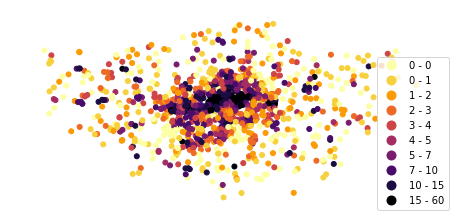

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


ValueError: ignored

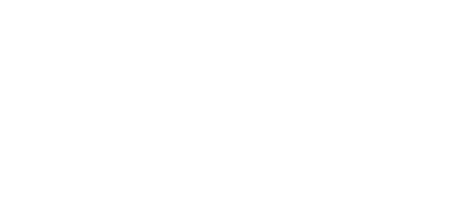

In [ ]:
gplt.kdeplot(gdf, hue='bank', cmap='Reds', shade=True, shade_lowest=True)

# join

In [ ]:
lsoa_df = pd.read_csv('./drive/MyDrive/Streetview/lsoa-data-new.csv')
lsoa_df.rename({'Lower Super Output Area': 'LSOA11CD'}, axis=1, inplace=True)
lsoa_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (88,94,158,159) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LSOA11CD,Names,Mid-year Population Estimates;All Ages;2013,Mid-year Population Estimates;Aged 0-15;2013,Mid-year Population Estimates;Aged 16-29;2013,Mid-year Population Estimates;Aged 30-44;2013,Mid-year Population Estimates;Aged 45-64;2013,Mid-year Population Estimates;Aged 65+;2013,Mid-year Population Estimates;Working-age;2013,2011 Census Population;Age Structure;All Ages,2012 Census Population;Age Structure;0-15,2013 Census Population;Age Structure;16-29,2014 Census Population;Age Structure;30-44,2015 Census Population;Age Structure;45-64,2016 Census Population;Age Structure;65+,2017 Census Population;Age Structure;Working-age,Population Density;Area (Hectares);,Population Density;Persons per hectare;2013,Households;All households;2011,Household Composition;Couple household with dependent children;2011,Household Composition;Couple household without dependent children;2011,Household Composition;Lone parent household;2011,Household Composition;One person household;2011,Household Composition;Other household Types;2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Couple household without dependent children;2011,Household Composition;% Lone parent household;2011,Household Composition;% One person household;2011,Household Composition;% Other multi person household;2011,Ethnic Group;White;2011,Ethnic Group;Mixed/multiple ethnic groups;2011,Ethnic Group;Asian/Asian British;2011,Ethnic Group;Black/African/Caribbean/Black British;2011,Ethnic Group;Other ethnic group;2011,Ethnic Group;BAME;2011,Ethnic Group;White (%);2011,Ethnic Group;Mixed/multiple ethnic groups (%);2011,Ethnic Group;Asian/Asian British (%);2011,Ethnic Group;Black/African/Caribbean/Black British (%);2011,Ethnic Group;Other ethnic group (%);2011,Ethnic Group;BAME (%);2011,Country of Birth;United Kingdom;2011,Country of Birth;Not United Kingdom;2011,Country of Birth;% United Kingdom;2011,Country of Birth;% Not United Kingdom;2011,Household Language;Households with at least one person aged 16 or over with English as a main language;2011,Household Language;Households where no people aged 16 or over have English as a main language;2011,Household Language;% of households with at least one person aged 16 or over with English as a main language;2011,Household Language;% of households where no people aged 16 or over have English as a main language;2011,Religion;Christian;2011,Religion;Buddhist;2011,Religion;Hindu;2011,Religion;Jewish;2011,Religion;Muslim;2011,Religion;Sikh;2011,Religion;Other religion;2011,Religion;No religion;2011,Religion;Religion not stated;2011,Religion;Christian (%);2011,Religion;Buddhist (%);2011,Religion;Hindu (%);2011,Religion;Jewish (%);2011,Religion;Muslim (%);2011,Religion;Sikh (%);2011,Religion;Other religion (%);2011,Religion;No religion (%);2011,Religion;Religion not stated (%);2011,Tenure;Owned outright;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Social rented;2011,Tenure;Private rented;2011,Tenure;Owned outright (%);2011,Tenure;Owned with a mortgage or loan (%);2011,Tenure;Social rented (%);2011,Tenure;Private rented (%);2011,Dwelling type;All Households;2011,Dwelling type;Household spaces with at least one usual resident;2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Detached;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace);2011,"Dwelling type;Flat, maisonette or apartment;2011",Dwelling type;Household spaces with at least one usual resident (%);2011,Dwelling type;Household spaces with no usual residents (%);2011,Dwelling type;Whole house or bungalow: Detached (%);2011,Dwelling type;Whole house or bungalow: Semi-detached (%);2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace) (%);2011,"Dwelling type;Flat, maisonette or apartment (%);2011",House Prices;Median Price (?;2014,House Prices;Sales;2014,Adults in Employment;

In [ ]:
lsoa_census= lsoa.merge(lsoa_df, on='LSOA11CD')
lsoa_census.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Names,Mid-year Population Estimates;All Ages;2013,Mid-year Population Estimates;Aged 0-15;2013,Mid-year Population Estimates;Aged 16-29;2013,Mid-year Population Estimates;Aged 30-44;2013,Mid-year Population Estimates;Aged 45-64;2013,Mid-year Population Estimates;Aged 65+;2013,Mid-year Population Estimates;Working-age;2013,2011 Census Population;Age Structure;All Ages,2012 Census Population;Age Structure;0-15,2013 Census Population;Age Structure;16-29,2014 Census Population;Age Structure;30-44,2015 Census Population;Age Structure;45-64,2016 Census Population;Age Structure;65+,2017 Census Population;Age Structure;Working-age,Population Density;Area (Hectares);,Population Density;Persons per hectare;2013,Households;All households;2011,Household Composition;Couple household with dependent children;2011,Household Composition;Couple household without dependent children;2011,Household Composition;Lone parent household;2011,Household Composition;One person household;2011,Household Composition;Other household Types;2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Couple household without dependent children;2011,Household Composition;% Lone parent household;2011,Household Composition;% One person household;2011,Household Composition;% Other multi person household;2011,Ethnic Group;White;2011,Ethnic Group;Mixed/multiple ethnic groups;2011,Ethnic Group;Asian/Asian British;2011,Ethnic Group;Black/African/Caribbean/Black British;2011,Ethnic Group;Other ethnic group;2011,Ethnic Group;BAME;2011,Ethnic Group;White (%);2011,Ethnic Group;Mixed/multiple ethnic groups (%);2011,Ethnic Group;Asian/Asian British (%);2011,Ethnic Group;Black/African/Caribbean/Black British (%);2011,Ethnic Group;Other ethnic group (%);2011,Ethnic Group;BAME (%);2011,Country of Birth;United Kingdom;2011,Country of Birth;Not United Kingdom;2011,Country of Birth;% United Kingdom;2011,Country of Birth;% Not United Kingdom;2011,Household Language;Households with at least one person aged 16 or over with English as a main language;2011,Household Language;Households where no people aged 16 or over have English as a main language;2011,Household Language;% of households with at least one person aged 16 or over with English as a main language;2011,Household Language;% of households where no people aged 16 or over have English as a main language;2011,Religion;Christian;2011,Religion;Buddhist;2011,Religion;Hindu;2011,Religion;Jewish;2011,Religion;Muslim;2011,Religion;Sikh;2011,Religion;Other religion;2011,Religion;No religion;2011,Religion;Religion not stated;2011,Religion;Christian (%);2011,Religion;Buddhist (%);2011,Religion;Hindu (%);2011,Religion;Jewish (%);2011,Religion;Muslim (%);2011,Religion;Sikh (%);2011,Religion;Other religion (%);2011,Religion;No religion (%);2011,Religion;Religion not stated (%);2011,Tenure;Owned outright;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Social rented;2011,Tenure;Private rented;2011,Tenure;Owned outright (%);2011,Tenure;Owned with a mortgage or loan (%);2011,Tenure;Social rented (%);2011,Tenure;Private rented (%);2011,Dwelling type;All Households;2011,Dwelling type;Household spaces with at least one usual resident;2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Detached;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace);2011,"Dwelling type;Flat, maisonette or apartment;2011",Dwelling type;Household spaces with at least one usual resident (%);2011,Dwelling type;Household spaces with no usual residents (%);2011,Dwelling type;Whole house or bungalow: Detached (%);2011,Dwelling type;Whole house or bungalow: Semi-detached (%);2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace) (%);2011,"Dwelling type

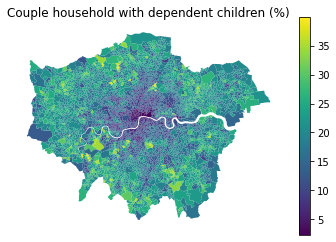

In [ ]:
fig, ax = plt.subplots(1, 1)
plt.axis('off')
plt.title('No cars or vans in household (%)')
lsoa_census.plot(column='Household Composition;% Couple household with dependent children;2011', ax=ax, legend=True)